# Исследование надежности заемщиков.

Заказчик — кредитный отдел банка.  
Нужно разобраться, <u>влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок</u>.  

Входные данные от банка — статистика о платёжеспособности клиентов.  

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Шаг 1. Обзор данных

<font size="4"><b>Описание данных:</b></font>

<b>children</b> — количество детей в семье  
<b>days_employed</b> — общий трудовой стаж в днях  
<b>dob_years</b> — возраст клиента в годах  
<b>education</b> — уровень образования клиента  
<b>education_id</b> — идентификатор уровня образования  
<b>family_status</b> — семейное положение  
<b>family_status_id</b> — идентификатор семейного положения  
<b>gender</b> — пол клиента  
<b>income_type</b> — тип занятости  
<b>debt</b> — имел ли задолженность по возврату кредитов  
<b>total_income</b> — ежемесячный доход  
<b>purpose</b> — цель получения кредита  

In [1]:
import pandas as pd
df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<font color='orange'><b>🙊 Наблюдения 0.1</b></font>

1) данные столбца days_employed выглядит странно - стаж с минусом. 

2) данные family_status	и family_status_id дублируют друг друга - пока можно сделать предположение:  
    - если женат - статус 0  
    - если гражданский брак - статус 1  
    
3) education - дубликаты данных (опечатки) + так же как пункт 2 education и education_id дублируют друг друга:  
    - высшее - статус 0   
    - среднее - статус 1  

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<font color='orange'><b>🙊 Наблюдения 0.2</b></font>

1) days_employed, total_income имеют пустые данные и <u>одинаковое их количество</u>.   
Можно предположить, что данные для этих столбцов отсуствуют в одних и тех же строках.

In [3]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [4]:
# выведем имена колонок

df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [5]:
print(f"Уникальные значения столбца {df.columns[3]}: {df['education'].unique()}")
print(f"Уникальные значения столбца {df.columns[5]}: {df['family_status'].unique()}")
print(f"Уникальные значения столбца {df.columns[7]}: {df['gender'].unique()}")
print(f"Уникальные значения столбца {df.columns[9]}: {df['debt'].unique()}")
print(f"Уникальные значения столбца {df.columns[-1]}: {df['purpose'].unique()}")

Уникальные значения столбца education: ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
Уникальные значения столбца family_status: ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
Уникальные значения столбца gender: ['F' 'M' 'XNA']
Уникальные значения столбца debt: [0 1]
Уникальные значения столбца purpose: ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жило

<font color='orange'><b>🙊 Наблюдения 0.3</b></font>

1) <b>children</b>: 

    - min значение - минус 1 ребенок. явная ошибка  
    - max значение - 20 детей. Если представить, что девушка может забеременить в ~ 13 лет (О_О) и рожала каждый год, то на момент подачи заявления человеку должно быть минимум 33 года. Запомним это. Выглядит для меня странно ( и страшно 😁). Думаю заменить это медианным значением, так как это сильно выпадающая точка.
    - у 75% семей один ребенок  
    
2) <b>days_employed</b>:

    - много данных с отрицательным знаком, надо разобраться с этим  
    - max значение - 401755.4 дня. Если это количество разделить на дни в году (365), то получится 1100.6 лет. Такого быть не может. Если предположить, что человек работает с 18 лет без увольнений, то максимально возможное число дней в 75 лет: (75 - 18) *365 = 20805. будем править.
    
3) <b>dob_years</b>:   

    - min значение - 0 лет. явная ошибка  
    - медианный возраст заемщиков - 42 года  
    
4) <b>education_id</b>:  

    - есть 5 рангов образования  
    
5) <b>family_status_id</b>: 

    - есть 5 рангов семейного статуса  
    - 75% людей живут в гражданском браке  
    
6) <b>debt</b>:  

    - тут можно сказать, что у большинства людей не было проблем с возвратом кредитов  
    
7) 	<b>total_income</b>:

    - медианный доход - 145000  
    
8) <b>gender</b>:

    - значение XNA - явно ошибка, но нам этот столбец не важен, поэтому ничего делать не будем
    
9) <b>education</b>:

    - дубликаты c разными регистрами букв- исправим
    
10) <b>purpose</b>:

    - явно можно все значения объеденить в группы
    
Исправим ошибки.

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Шаг 2.1 Проверка данных на аномалии и исправления.

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Например, отрицательное количество дней трудового стажа в столбце days_employed. Для реальных данных это нормально.   
Обработайте значения в столбцах с аномалиями и опишите возможные причины появления таких данных.

<font color='orange'><b>🙊 Наблюдения 0.4</b></font>

<b>Аномалии, которые я нашла:</b>
1) children: - min значение - минус 1 ребенок, уберем минус  
2) children: - max значение - 20, поставим медианное значение  
3) dob_years: - min значение - 0 лет  
4) days_employed: - много данных с отрицательным знаком, уберем минус  
5) days_employed: - max значение - 401755.4 -> 20805

In [6]:
#количество строк, где детей отрицательное количество

df[df['children'] < 0].shape[0]

47

In [7]:
# поменяем -1 на 1 и проверим 

df['children'] = df['children'].replace(-1, 1)
df[df['children'] < 0].shape[0]

0

In [8]:
# посмотрим, сколько вообще детей есть в семьях

df['children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

In [9]:
# так как от 5 до 20 нет чисел, то заменим 20 на медианное значение и сделаем проверку

df['children'] = df['children'].replace(20, df['children'].median())
df[df['children'] == 20].shape[0]

0

In [10]:
#количество строк, где человеку 0 лет 

df[df['dob_years'] == 0].shape[0]

101

In [11]:
# так как я не знаю, куда отнести этот ноль, я решила удалить эти строки (тем более потеренных данных будет
# немного (0.5%)) и сделаем проверку

df = df.loc[df['dob_years'] != 0]
df[df['dob_years'] == 0].shape[0]

0

In [12]:
# првоерим, как изменились данные в df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21424 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21424 non-null  float64
 1   days_employed     19260 non-null  float64
 2   dob_years         21424 non-null  int64  
 3   education         21424 non-null  object 
 4   education_id      21424 non-null  int64  
 5   family_status     21424 non-null  object 
 6   family_status_id  21424 non-null  int64  
 7   gender            21424 non-null  object 
 8   income_type       21424 non-null  object 
 9   debt              21424 non-null  int64  
 10  total_income      19260 non-null  float64
 11  purpose           21424 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


In [13]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21424.000000,19260.000000,21424.000000,21424.000000,21424.000000,21424.000000,1.926000e+04
mean,0.472647,63032.838333,43.497479,0.817914,0.971294,0.080891,1.674652e+05
std,0.750421,140819.014270,12.246934,0.548224,1.419737,0.272673,1.030873e+05
min,0.000000,-18388.949901,19.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2748.301767,33.000000,1.000000,0.000000,0.000000,1.030930e+05
50%,0.000000,-1203.637301,43.000000,1.000000,0.000000,0.000000,1.450117e+05
75%,1.000000,-291.172875,53.000000,1.000000,1.000000,0.000000,2.033700e+05
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<font color='orange'><b>🙊 Наблюдения 0.5</b></font>

1) аномальное значение с подсчетом количества детей исправлено  
2) в столбце с возрастом клиента теперь мин значение - 19 лет. Это соответсвует адекватности.

Теперь разберемся с отрицательным  и большим стажом.

In [14]:
#количество строк, где стаж - отрицательное число

df[df['days_employed'] < 0].shape[0]

15832

In [15]:
# посмотрим, какая медиана и среднее будет у столбца days_employed, если не убирать минус

print(f"Медиана с аномальными значениями {df['days_employed'].median()}")
print(f"Среднее с аномальными значениями {df['days_employed'].mean()}")

Медиана с аномальными значениями -1203.6373006422905
Среднее с аномальными значениями 63032.83833320626


In [16]:
# посмотрим, какая медиана и среднее будет у столбца days_employed, если убрать минус 

df.loc[df['days_employed'] < 0, 'days_employed'] = abs(df['days_employed']) 
print(f"Медиана без аномальных значений {df['days_employed'].median()}")
print(f"Среднее без аномальных значений {df['days_employed'].mean()}")

Медиана без аномальных значений 2197.359789516353
Среднее без аномальных значений 66902.43787703343


In [17]:
# найдем средний возраст для людей, со стажем больше 20805

age = df[df['days_employed'] > 20805]
age['dob_years'].mean()

59.41802800466744

In [18]:
f'для человека 59 лет, который работает с 18 лет, стаж будет равен {(59-18) * 365}'

'для человека 59 лет, который работает с 18 лет, стаж будет равен 14965'

In [19]:
# заменим этим значением весь стаж, который больше 20805

def decrease_days(day):
    if day > 20805:
        day = 14965
        return day
    else:
        return day
    
df['days_employed'] = df['days_employed'].apply(decrease_days)

In [20]:
# check

df[df['days_employed'] > 20805].shape[0]

0

In [21]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21424.000000,19260.000000,21424.000000,21424.000000,21424.000000,21424.000000,1.926000e+04
mean,0.472647,4598.352212,43.497479,0.817914,0.971294,0.080891,1.674652e+05
std,0.750421,5257.102554,12.246934,0.548224,1.419737,0.272673,1.030873e+05
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,926.851509,33.000000,1.000000,0.000000,0.000000,1.030930e+05
50%,0.000000,2197.359790,43.000000,1.000000,0.000000,0.000000,1.450117e+05
75%,1.000000,5539.681747,53.000000,1.000000,1.000000,0.000000,2.033700e+05
max,5.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<font color='orange'><b>🙊 Наблюдения 0.6</b></font>

Мы исправили все аномалии документа, теперь можно заполнять пропуски.  
Аномали могли возникнуть из-за опечаток (возможно 20 детей вместо 2 например - в стаже).  
Так же, про странные значения (например большой стаж) лучше уточнять у людей, которые собирают данные.  
Заменять максимальный стаж как мы сделали необязательно, так как он не участвует в анализе, но так данные выглядят более адекватно (по моему мнению).

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Шаг 2.2 Заполнение пропусков

1) В двух столбцах есть пропущенные значения, найдите их и заполните медианным значением по столбцу: опишите, какие пропущенные значения вы обнаружили;  
2) проверьте, какую долю составляют пропущенные значения в каждом из столбцов с пропусками;  
3) приведите возможные причины появления пропусков в данных;  
4) объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.  

In [22]:
# посчитаем сколько пустых данных

df.isna().sum()

children               0
days_employed       2164
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2164
purpose                0
dtype: int64

In [23]:
#посмотрим на строки с пропущенными значениями в столбце days_employed

empty_days_employed = df[df['days_employed'].isna()]
empty_days_employed.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21415,0.0,NaN,54,среднее,1,женат / замужем,0,F,пенсионер,0,NaN,операции с жильем
21423,0.0,NaN,63,среднее,1,женат / замужем,0,M,пенсионер,0,NaN,сделка с автомобилем
21426,0.0,NaN,49,среднее,1,женат / замужем,0,F,сотрудник,1,NaN,недвижимость
21432,1.0,NaN,38,неоконченное высшее,2,Не женат / не замужем,4,F,сотрудник,0,NaN,операции с жильем
21463,1.0,NaN,35,высшее,0,гражданский брак,1,M,сотрудник,0,NaN,на проведение свадьбы
21489,2.0,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1.0,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0.0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1.0,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости
21510,2.0,NaN,28,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,приобретение автомобиля


In [24]:
# проверим, верна ли гипотеза про соответствие пустых строк days_employed и total_income

empty_days_employed.isna().sum()

children               0
days_employed       2164
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2164
purpose                0
dtype: int64

In [25]:
#доля пропущенных строк к общему количеству строк в столбце

round(df['days_employed'].isna().value_counts()[1] / df.shape[0], 2)

0.1

<font color='orange'><b>🙊 Наблюдения 0.7</b></font>

1) пустые строки и правда совпадают в двух столбцах. А значит и доля пропущенных значений будут одинаковая для двух столбцов.  
2) так как данных нет в столбце стаж и доход, можно предположить, что данных и правда нет, так как если нет работы - нет дохода. 

<b>Чтобы выдвинуть другие теории, изучим эти данные с пропусками.</b>

In [26]:
empty_days_employed['education'].str.lower().value_counts()

среднее                1533
высшее                  541
неоконченное высшее      69
начальное                21
Name: education, dtype: int64

In [27]:
empty_days_employed['gender'].value_counts()

F    1476
M     688
Name: gender, dtype: int64

In [28]:
empty_days_employed['children'].value_counts().head(1)

0.0    1440
Name: children, dtype: int64

In [29]:
empty_days_employed['family_status'].str.lower().value_counts().index[0]

'женат / замужем'

In [30]:
empty_days_employed['debt'].value_counts()

0    1994
1     170
Name: debt, dtype: int64

<font color='orange'><b>🙊 Наблюдения 0.8</b></font>

Можно предположить, что стандартный портрет человека с пропущенными данными - женщина, замужем, без высшего образования, без детей и без проблем с долгами перед банком.  
Соотвественно, маловероятно, что она зарабатывает сама.  
Так что, я буду придерживаться своей теории.

Возможно, что данные были сокрыты сознательно или все же ошибка человека.  

Так же велика вероятность, что программа сама автоматически ставит NaN в total_income если days_employed вбито как NaN.

In [31]:
# сравним df с данными со всей таблицы

empty_days_employed.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,2164.000000,0.0,2164.000000,2164.000000,2164.000000,2164.000000,0.0
mean,0.472736,NaN,43.833641,0.801294,0.974122,0.078558,NaN
std,0.763654,NaN,12.203357,0.530423,1.418547,0.269110,NaN
min,0.000000,NaN,19.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,34.000000,0.750000,0.000000,0.000000,NaN
50%,0.000000,NaN,43.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,NaN,54.000000,1.000000,1.000000,0.000000,NaN
max,5.000000,NaN,73.000000,3.000000,4.000000,1.000000,NaN


In [32]:
# данные со всей таблицы

df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21424.000000,19260.000000,21424.000000,21424.000000,21424.000000,21424.000000,1.926000e+04
mean,0.472647,4598.352212,43.497479,0.817914,0.971294,0.080891,1.674652e+05
std,0.750421,5257.102554,12.246934,0.548224,1.419737,0.272673,1.030873e+05
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,926.851509,33.000000,1.000000,0.000000,0.000000,1.030930e+05
50%,0.000000,2197.359790,43.000000,1.000000,0.000000,0.000000,1.450117e+05
75%,1.000000,5539.681747,53.000000,1.000000,1.000000,0.000000,2.033700e+05
max,5.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<font color='orange'><b>🙊 Наблюдения 0.9</b></font>

1) Если посмотреть на mean(среднее) и std(стандартное отклонение), мы видим, что они почти одинаковые для двух DataFramов. Значит выборка дает нам такое же представление о данных, как и весь фал df целиком. Но, для более точного анализа в df гораздо больше данных, что нам полезнее.  
2) Среднее значение очень чувствительно к выбросам. Так же, чем ближе стандартное отклонение к нулю, тем точнее определено среднее. Мы можем увидеть, что стандартное отклонение почти у всех столбцов больше, чем среднее. В этих случаях среднее не актуально, лучше ориентроваться на медиану.

In [33]:
#заполняем медианным значением столбцы и проверяем сколько пустых значений осталось

df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())
df['total_income'] = df['total_income'].fillna(df['total_income'].median())

df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [34]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21424.000000,21424.000000,21424.000000,21424.000000,21424.000000,21424.000000,2.142400e+04
mean,0.472647,4355.832253,43.497479,0.817914,0.971294,0.080891,1.651972e+05
std,0.750421,5036.756610,12.246934,0.548224,1.419737,0.272673,9.797610e+04
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,1025.650954,33.000000,1.000000,0.000000,0.000000,1.078249e+05
50%,0.000000,2197.359790,43.000000,1.000000,0.000000,0.000000,1.450117e+05
75%,1.000000,4779.464934,53.000000,1.000000,1.000000,0.000000,1.955086e+05
max,5.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Шаг 2.3. Изменение типов данных.

Замените вещественный тип данных в столбце total_income на целочисленный, например, с помощью метода astype().

In [35]:
# Заменим так же и значения в стаже, так как измеряется в целых днях

df['total_income'] = df['total_income'].astype('int')
df['days_employed'] = df['days_employed'].astype('int')

df.dtypes

children            float64
days_employed         int64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income          int64
purpose              object
dtype: object

In [36]:
df.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1.0,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0.0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья


<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Шаг 2.4. Удаление дубликатов.

Если в данных присутствуют строки-дубликаты, удалите их.   
Также обработайте неявные дубликаты. Например, в столбце education есть одни и те же значения, но записанные по-разному:   
с использованием заглавных и строчных букв.  
Приведите их к одному регистру.   
Проверьте остальные столбцы.  
После удаления дубликатов сделайте следующее:
поясните, как выбирали метод для поиска и удаления дубликатов в данных;  
приведите возможные причины появления дубликатов.  

In [37]:
# приводим все значения в нижний регистр для посика дубликатов

df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()
df['income_type'] = df['income_type'].str.lower()
df['purpose'] = df['purpose'].str.lower()

In [38]:
df[df.duplicated()].head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0.0,2197,41,среднее,1,женат / замужем,0,F,сотрудник,0,145011,покупка жилья для семьи
3290,0.0,2197,58,среднее,1,гражданский брак,1,F,пенсионер,0,145011,сыграть свадьбу
4182,1.0,2197,34,высшее,0,гражданский брак,1,F,сотрудник,0,145011,свадьба


In [39]:
# удаляем дубликаты, удаляем пустые строки 

print(f'Количество дубликатов {df.duplicated().sum()}')
print('------')
df = df.drop_duplicates()
df = df.dropna().reset_index(drop=True) 
df.info()

Количество дубликатов 71
------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21353 non-null  float64
 1   days_employed     21353 non-null  int64  
 2   dob_years         21353 non-null  int64  
 3   education         21353 non-null  object 
 4   education_id      21353 non-null  int64  
 5   family_status     21353 non-null  object 
 6   family_status_id  21353 non-null  int64  
 7   gender            21353 non-null  object 
 8   income_type       21353 non-null  object 
 9   debt              21353 non-null  int64  
 10  total_income      21353 non-null  int64  
 11  purpose           21353 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


In [40]:
# проверка данных на дубликаты

print(df['education'].unique())
print(df['family_status'].unique())
print(df['income_type'].unique())
print(df['purpose'].unique())

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'не женат / не замужем']
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'оп

<font color='orange'><b>🙊 Наблюдения 0.10</b></font>

Дубликаты могли появится из-за опечаток, задваивания информации программой.  
Методы использовала стандартные, как нас учили =)  
Так же видно, что столбец 'purpose' имеет схожие данные, которые можно объеденить в большие группы.

<font color='blue'><b>Необходимо разделить family_status и family_status_id, education и education_id, чтобы не было дублирования и наш DataFrame будет готов к анализу и разделению на категории.</b></font>

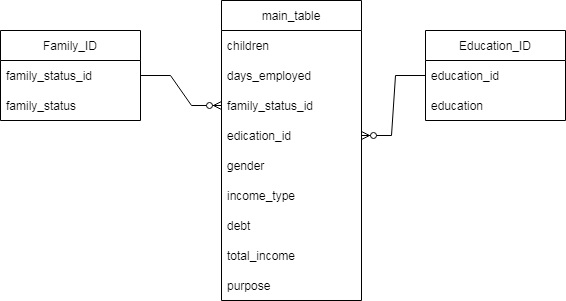

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создайте два новых датафрейма со столбцами:  
education_id и education — в первом;  
family_status_id и family_status — во втором.  
Удалите из исходного датафрейма столбцы education и family_status, оставив только их идентификаторы: education_id и family_status_id.  
Новые датафреймы — это те самые «словари» (не путайте с одноимённой структурой данных в Python), к которым вы сможете обращаться по идентификатору.

In [41]:
# создаем две новые таблицы

educat_id = df[['education_id', 'education']]
family_id = df[['family_status_id', 'family_status']]

print(educat_id.head(3))
print('*****')
print(family_id.head(3))

   education_id education
0             0    высшее
1             1   среднее
2             1   среднее
*****
   family_status_id    family_status
0                 0  женат / замужем
1                 0  женат / замужем
2                 0  женат / замужем


In [42]:
# удаляем дубликаты

educat_id = educat_id.drop_duplicates()
educat_id = educat_id.dropna().reset_index(drop=True) 

family_id = family_id.drop_duplicates()
family_id = family_id.dropna().reset_index(drop=True) 

In [43]:
educat_id

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [44]:
family_id

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


In [45]:
# удаляем лишний столбцы из главной таблицы

df = df.drop('education', 1) 
df = df.drop('family_status', 1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21353 non-null  float64
 1   days_employed     21353 non-null  int64  
 2   dob_years         21353 non-null  int64  
 3   education_id      21353 non-null  int64  
 4   family_status_id  21353 non-null  int64  
 5   gender            21353 non-null  object 
 6   income_type       21353 non-null  object 
 7   debt              21353 non-null  int64  
 8   total_income      21353 non-null  int64  
 9   purpose           21353 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 1.6+ MB


<font color='orange'><b>🙊 Наблюдения 0.11</b></font>

Создали словари, выглядит красиво 🐼

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Шаг 2.6. Категоризация дохода.

На основании диапазонов, указанных ниже, создайте столбец total_income_category с категориями:  
0–30000 — 'E';  
30001–50000 — 'D';  
50001–200000 — 'C';  
200001–1000000 — 'B';  
1000001 и выше — 'A'.  
Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.

In [46]:
# создадим функцию, котоая присваивает категории

def income_group(income):
    if 0 <= income <= 30000:
        return 'E'
    if income in range(30001, 50001):
        return 'D'
    if income in range(50001, 200001):
        return 'C'
    if income in range(200001, 1000001):
        return 'B'
    else:
        return 'A'

In [47]:
# check

list = [5, 30001, 45000, 52000, 199000, 200005, 999999, 2000000]

for i in list:
    print(income_group(i), end=';')

E;D;D;C;C;B;B;A;

In [48]:
#добавим новый столбик в df

df['total_income_category'] = df['total_income'].apply(income_group)
df.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1.0,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1.0,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0.0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3.0,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0.0,14965,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


In [49]:
# посчитаем количество людей с разными категориями доходов

df.groupby('total_income_category')['family_status_id'].count()

total_income_category
A       25
B     5015
C    15943
D      348
E       22
Name: family_status_id, dtype: int64

<font color='orange'><b>🙊 Наблюдения 0.12</b></font>

Наибольшое количество людей имет категорию дохода - С. Это коррелируются с мадианным значением в 145000.

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Шаг 2.7. Категоризация целей кредита.

Создайте функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:  
'операции с автомобилем',  
'операции с недвижимостью',  
'проведение свадьбы',  
'получение образования'.  
Например, если в столбце purpose находится подстрока 'на покупку автомобиля', то в столбце purpose_category должна появиться строка 'операции с автомобилем'.  
Вы можете использовать собственную функцию и метод apply(). Изучите данные в столбце purpose и определите, какие подстроки помогут вам правильно определить категорию.

<font color='orange'><b>🙊 Наблюдения 0.13</b></font>

Мой "гениальный" мозг догадался лишь на то, чтобы сделать такую функцию, которая по части слова ищет совпадения в столбце purpose и в случае совпадения, возвращает необходимую категорию.  
Не уверена, что это супер вариант. Если у тебя есть варианты, которые ты мог бы показать - буду оч благодарна.  
Сложные функции для меня пока оч тяжело.  

И постоянная проблема - я не до конца понимаю, как обратиться к отдельным словам в столбце DataFrame, когда пишешь функции. Т.е. сначала ты обращаешься к столбцу, потом к строке, потом к слову?

        for i in df['purpose']:  
                for j in df['purpose'][i]:  
                        k in ???? 
        
Не до конца понимаю иерархию построения и синтаксис в этом случае 😩  
Мб у тебя есть ссылки полезные?

In [50]:
# Создаем копию столбца purpose, которая будет исправлена

df['purpose_category'] = df['purpose']

In [51]:
# Создаем функцию, которая меняет одно значение на другое

def replace_purpose(purpose):
    if 'авто' in purpose:
        return 'операции с автомобилем'
    elif 'недвиж' in purpose or 'жиль' in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'образо' in purpose:
        return 'получение образования'

df['purpose_category'] = df['purpose'].apply(replace_purpose)

In [52]:
df['purpose']

0                       покупка жилья
1             приобретение автомобиля
2                       покупка жилья
3          дополнительное образование
4                     сыграть свадьбу
                     ...             
21348               операции с жильем
21349            сделка с автомобилем
21350                    недвижимость
21351    на покупку своего автомобиля
21352           на покупку автомобиля
Name: purpose, Length: 21353, dtype: object

In [53]:
# Проверяем корректность работы

df['purpose_category'].unique()

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

In [54]:
df['purpose_category'].head(10)

0    операции с недвижимостью
1      операции с автомобилем
2    операции с недвижимостью
3       получение образования
4          проведение свадьбы
5    операции с недвижимостью
6    операции с недвижимостью
7       получение образования
8          проведение свадьбы
9    операции с недвижимостью
Name: purpose_category, dtype: object

In [55]:
# посчитаем количество запросов по темам

df.groupby('purpose_category')['family_status_id'].count()

purpose_category
операции с автомобилем       4284
операции с недвижимостью    10764
получение образования        3995
проведение свадьбы           2310
Name: family_status_id, dtype: int64

<font color='orange'><b>🙊 Наблюдения 0.14</b></font>

Большинству людей необходим кредит на недвижимость

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Ответы на вопросы.

##### Вопрос 1:

Есть ли зависимость между количеством детей и возвратом кредита в срок? 

In [56]:
# здесь не будет категаризировать данные, так как категорий всего 6 - по количеству детей в семье

# 'total_credit_count' - общее количество кредитов
# 'debt_fail_count' - количество просроченных платежей
# 'fail_%' - отношение просрочееных платежей к общему количеству 

child_vs_debt = pd.DataFrame()

child_vs_debt['total_credit_count'] = df.groupby('children')['debt'].count() 
child_vs_debt['debt_fail_count'] = df.pivot_table(index=['children'], values='debt', aggfunc='sum')
child_vs_debt['fail_%'] = round((child_vs_debt['debt_fail_count'] / child_vs_debt['total_credit_count']) *100, 2)
child_vs_debt.sort_values('fail_%', ascending = False)

,total_credit_count,debt_fail_count,fail_%
children,,,
4.0,41,4,9.76
2.0,2039,194,9.51
1.0,4839,442,9.13
3.0,328,27,8.23
0.0,14097,1066,7.56
5.0,9,0,0.00


##### Вывод 1:

Зависимость есть:  
1) Бездетные реже платят невовремя, чем люди с детьми.  
2) Чем больше детей - тем больше количество просроченных задолженностей, но люди с 3-мя детьми чаще платят вовремя, чем люди с 1 - 2 детьми.  
3) Данные для семьи с 5-ью детьми выглядяит странно по сравнению с общей тенденцией. Возможно, нужно больше данных для более точной оценки. 

##### Вопрос 2:

Есть ли зависимость между семейным положением и возвратом кредита в срок?  

In [57]:
# создаем новый DataFrame вместе со столбцом с расшифровкой family_status

df_new = df.merge(family_id, on='family_status_id', how='left')

In [58]:
# создаем новый DataFrame с двумя столбцами на основе предидущего

family_df = df_new[["family_status", 'debt']]

In [59]:
# здесь не будет категаризировать данные, так как категорий всего 5 - по количеству детей

# 'total' - общее количество кредитов
# 'fail_count' - количество просроченных платежей
# 'fail_%' - отношение просрочееных платежей к общему количеству  

fam_vs_debt = family_df.groupby(['family_status']) \
    .agg({'debt':['count', 'sum']}) \
    .rename(columns={'count': 'total', 'sum': 'fail_count'}) 
fam_vs_debt['fail_%'] = round((family_df.groupby('family_status')['debt'].sum() / family_df.groupby('family_status')['debt'].count()) *100,2)

fam_vs_debt.sort_values('fail_%', ascending = False)

debt            fail_%
                       total fail_count       
family_status                                 
не женат / не замужем   2794        273   9.77
гражданский брак        4130        386   9.35
женат / замужем        12290        927   7.54
в разводе               1185         85   7.17
вдовец / вдова           954         62   6.50

##### Вывод 2:

Зависимость есть:

1) Не замужние и люди в гражданском браке чаще не платят вовремя  
2) Овдовевшие люди чаще платят вовремя

##### Вопрос 3:

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?  

In [60]:
# создаем новый DataFrame с двумя столбцами

salary_df = df[["total_income_category", 'debt']]

In [61]:
# 'total' - общее количество кредитов
# 'fail_count' - количество просроченных платежей
# 'fail_%' - отношение просрочееных платежей к общему количеству  

salary_vs_debt = salary_df.groupby(['total_income_category']) \
    .agg({'debt':['count', 'sum']}) \
    .rename(columns={'count': 'total', 'sum': 'fail_count'}) 
salary_vs_debt['fail_%'] = round((salary_df.groupby('total_income_category')['debt'].sum() / salary_df.groupby('total_income_category')['debt'].count()) *100,2)

salary_vs_debt.sort_values('fail_%', ascending = False)

debt            fail_%
                       total fail_count       
total_income_category                         
E                         22          2   9.09
C                      15943       1353   8.49
A                         25          2   8.00
B                       5015        355   7.08
D                        348         21   6.03

##### Вывод 3:

Зависимость есть:

1) Люди, у которых самый низкий доход, возвращают кредит невовремя чаще   
2) Люди, у которых доход до 50000 - возвращают деньги вовремя чаще

##### Вопрос 4:

Как разные цели кредита влияют на его возврат в срок?   

In [62]:
# создаем новый DataFrame с двумя столбцами

goals_df = df[["purpose_category", 'debt']]

In [63]:
# 'total' - общее количество кредитов
# 'fail_count' - количество просроченных платежей
# 'fail_%' - отношение просрочееных платежей к общему количеству  

goals_vs_debt = goals_df.groupby(['purpose_category']) \
    .agg({'debt':['count', 'sum']}) \
    .rename(columns={'count': 'total', 'sum': 'fail_count'}) 
goals_vs_debt['fail_%'] = round((goals_df.groupby('purpose_category')['debt'].sum() / goals_df.groupby('purpose_category')['debt'].count()) *100,2)

goals_vs_debt.sort_values('fail_%', ascending = False)

debt            fail_%
                          total fail_count       
purpose_category                                 
операции с автомобилем     4284        400   9.34
получение образования      3995        370   9.26
проведение свадьбы         2310        184   7.97
операции с недвижимостью  10764        779   7.24

##### Вывод 4:

Зависимость есть:

1) Чаще просрочки приходятся на кредиты на автомобили и получение образования  
2) С покупки квартиры и оплаты свадьбы люди возвращают деньги вовремя чаще

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## Общий вывод:

По данным можно нарисовать портрет надежного и менее надежного заемщика:

In [64]:
pd.DataFrame({
    "Заемщик": ["Надежный", "Менее надежный"],
    "Наличие детей": ["Не имеет детей", "Имеет 1-2 ребенка"],
    "Семейный статус": ['Был в браке', 'Гражданский брак/холост'],
    "Уровень дохода": ["30000 - 50000", "> 50000"],
    "Цель кредита": ['Недвижимость', 'Автомобиль, образование']
}) 

,Заемщик,Наличие детей,Семейный статус,Уровень дохода,Цель кредита
0,Надежный,Не имеет детей,Был в браке,30000 - 50000,Недвижимость
1,Менее надежный,Имеет 1-2 ребенка,Гражданский брак/холост,> 50000,"Автомобиль, образование"
